In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\mosta\Downloads\archive (16).zip"

df = pd.read_csv(file_path, compression='zip')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)

In [6]:
df.isnull().sum()

Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64

In [8]:
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['order_date'] = df['order_date_time'].dt.date
df['order_hour'] = df['order_date_time'].dt.hour

print(df['order_hour'].value_counts().sort_index())  # Orders per hour
print(df['order_date'].value_counts().sort_index())  # Orders per day
print(df['order_date_time'].dt.day_name().value_counts())  # Orders per day of the week

order_hour
0     2
3     1
6     1
8     1
9     2
10    4
11    2
12    4
13    2
14    4
15    1
16    2
17    2
18    1
19    1
20    2
21    3
22    2
23    1
Name: count, dtype: int64
order_date
2023-07-21    1
2023-07-25    1
2023-07-26    1
2023-07-29    2
2023-07-30    1
2023-07-31    1
2023-08-01    3
2023-08-02    1
2023-08-03    8
2023-08-04    4
2023-08-05    4
2023-08-06    3
2023-08-07    2
2023-08-08    2
2023-08-09    2
2023-08-12    1
2023-08-13    1
Name: count, dtype: int64
order_date_time
Thursday     8
Saturday     7
Tuesday      6
Friday       5
Sunday       5
Wednesday    4
Monday       3
Name: count, dtype: int64


In [11]:
print(df['Product_category'].value_counts().head(5))
print(df['Product_category'].value_counts().tail(5))


Product_category
Electronics        34
Home Appliences     3
LifeStyle           1
Name: count, dtype: int64
Product_category
Electronics        34
Home Appliences     3
LifeStyle           1
Name: count, dtype: int64


In [16]:
category_revenue = df.groupby('Product_category')['Item_price'].sum().sort_values(ascending=False)
print(category_revenue.head(5))


Product_category
Electronics        29736.0
Home Appliences     2792.0
LifeStyle            999.0
Name: Item_price, dtype: float64


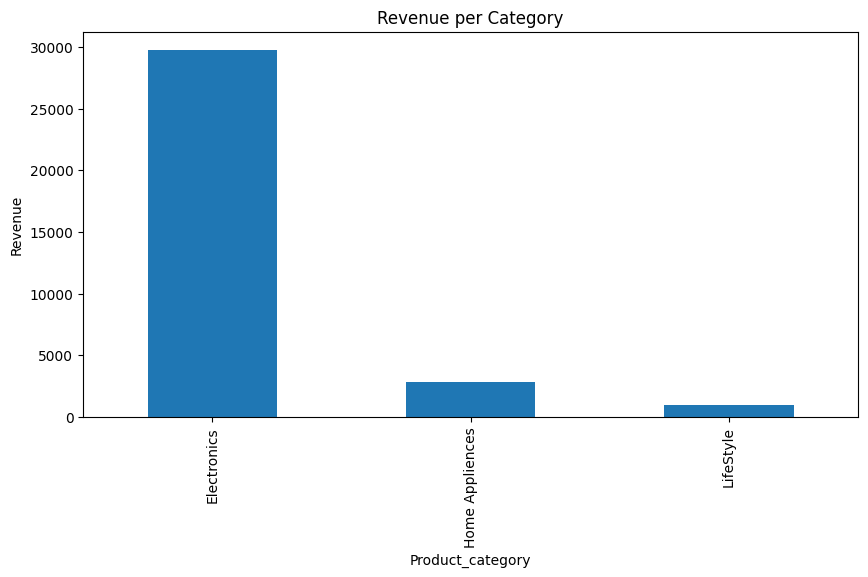

In [17]:
category_revenue.plot(kind='bar', figsize=(10, 5))
plt.title('Revenue per Category')
plt.ylabel('Revenue')
plt.show()